In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from nicaviz import analyze as nicaplot
import pandas as pd
import seaborn as sns
import itertools
from numpy import random
import numpy as np


import math
import matplotlib.pyplot as plt

In [3]:
DFLEN = 1000
df = pd.DataFrame({
    'int_small': random.randint(low=0, high=5, size=DFLEN),
    'int_med': random.randint(low=0, high=20, size=DFLEN),
    'str_med': random.choice(["a","b","c","d","e","f","g"], size=DFLEN),
    'str_small': random.choice(["blue","red"], size=DFLEN),
    'cont_rand': random.random(size=DFLEN)*10,
    'cont_uni': random.normal(loc=0, scale=1, size=DFLEN)*10})

display(df)

,cont_rand,cont_uni,int_med,int_small,str_med,str_small
0,1.015174,3.556853,2,3,e,blue
1,9.174805,2.614080,2,4,f,red
2,6.131866,-8.973885,5,1,f,blue
3,1.859779,-3.857855,14,4,g,blue
4,8.945998,8.698731,9,3,d,red
5,9.141131,-0.803513,1,4,f,red
6,4.860905,15.587940,0,0,a,red
7,5.214579,3.324839,6,3,b,blue
8,3.963280,7.568937,12,2,b,red
9,5.290359,4.109480,6,3,d,red


In [4]:
nicaplot.describe(df)

Dataframe Dimension: 1000 Rows, 6 Columns


,Unique,Missing,dtype,ValCount 1,Occ,ValCount 2,Occ,ValCount 3,Occ,ValCount 4,Occ,ValCount 5,Occ
Column,,,,,,,,,,,,,
cont_rand,1000,0,float64,5.7427,1,0.16578,1,7.58583,1.0,9.9055,1.0,7.17452,1.0
cont_uni,1000,0,float64,12.8372,1,-0.198319,1,2.83211,1.0,-1.93486,1.0,10.664,1.0
int_med,20,0,int64,2,61,19,58,8,58.0,11,58.0,7,57.0
int_small,5,0,int64,2,214,1,207,4,198.0,0,192.0,3,189.0
str_med,7,0,object,d,170,g,144,c,141.0,f,141.0,a,138.0
str_small,2,0,object,red,507,blue,493,NaN,NaN,NaN,NaN,NaN,NaN


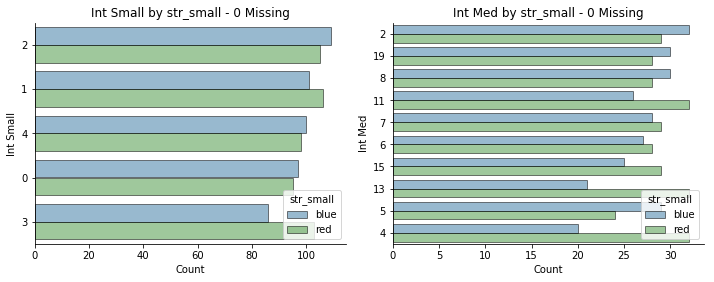

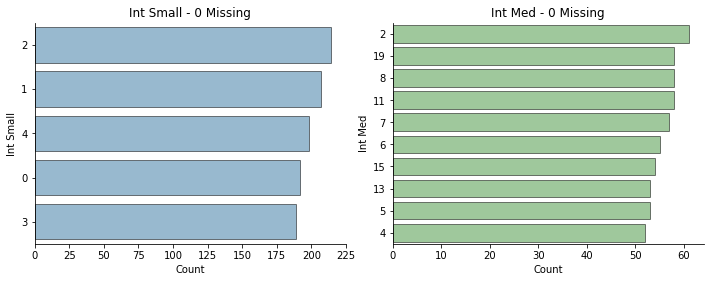

In [9]:
nicaplot.Plotgrid(["int_small", "int_med"])\
    .build(func=nicaplot.multi_plot,
           df=df,
           hue="str_small",
           iti_palette=sns.color_palette("Paired")[1::2],
           plottype="countplot")

nicaplot.Plotgrid(["int_small", "int_med"])\
    .build(func=nicaplot.multi_plot,
           df=df,
           iti_palette=itertools.cycle(sns.color_palette("Paired")[1::2]),
           plottype="countplot")

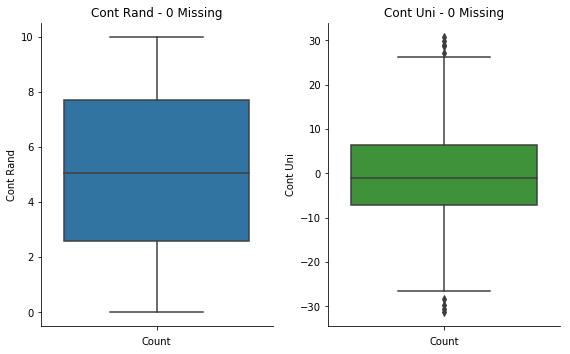

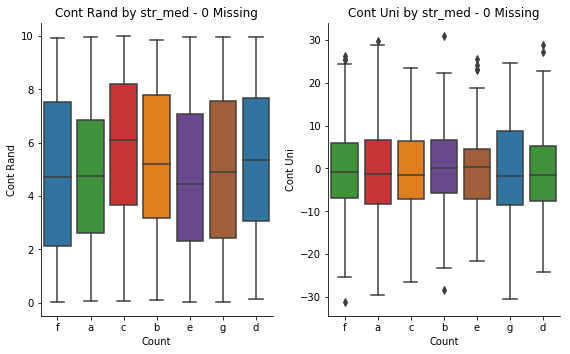

In [58]:
plotgrid = Plotgrid(["cont_rand", "cont_uni"], 2, [8,5])
plotgrid.build(func=custom_countplot, df=df, iti_palette=itertools.cycle(sns.color_palette("Paired")[1::2]),
              plotfunc=sns.boxplot)
plotgrid = Plotgrid(["cont_rand", "cont_uni"], 2, [8,5])
plotgrid.build(func=custom_countplot, df=df, hue='str_med',
               iti_palette=itertools.cycle(sns.color_palette("Paired")[1::2]),
               plotfunc=sns.boxplot)

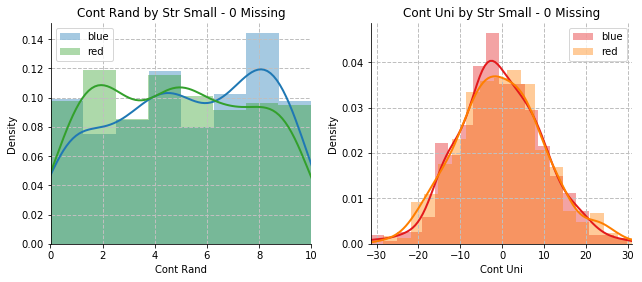

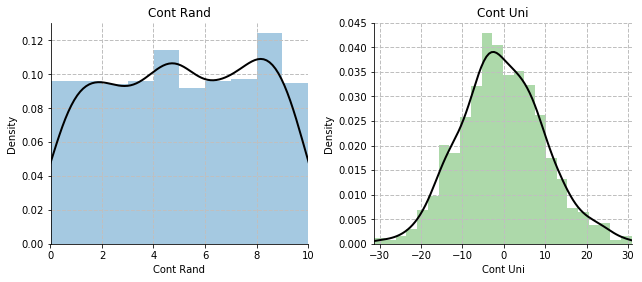

In [36]:
def custom_distplot(col, ax, df, iti_palette, hue=None, top_n = 10):
    valmin, valmax = df[col].min(), df[col].max()
    clean_col_name = col.replace("_", " ").title()
    
    if hue:
        hue_cats = df[hue].value_counts().index[:top_n]
        clean_huecol_name = hue.replace("_", " ").title()
        for h in hue_cats:
            pdf = df.loc[df[hue] == h, col]
            pal = next(iti_palette)
            sns.distplot(pdf, ax=ax, color=pal, kde_kws={"color": pal, "lw": 2}, label = h)
        ax.set_title("{} by {} - {:.0f} Missing".format(clean_col_name, clean_huecol_name,
                df[col].isnull().sum()))
        ax.legend()
    else:
        sns.distplot(df[col], ax=ax, color=next(iti_palette), kde_kws={"color": "k", "lw": 2})
        ax.set_title("{}".format(clean_col_name))
        
    ax.set_xlim(valmin, valmax)
    ax.set_xlabel(clean_col_name)
    ax.set_ylabel("Density")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True, lw = 1, ls = '--', c = '.75')

plotgrid = Plotgrid(["cont_rand", "cont_uni"], 2, [9,4])
plotgrid.build(func=custom_distplot, df=df,
               iti_palette=itertools.cycle(sns.color_palette("Paired")[1::2]), hue = "str_small")

plotgrid = Plotgrid(["cont_rand", "cont_uni"], 2, [9,4])
plotgrid.build(func=custom_distplot, df=df,
               iti_palette=itertools.cycle(sns.color_palette("Paired")[1::2]))

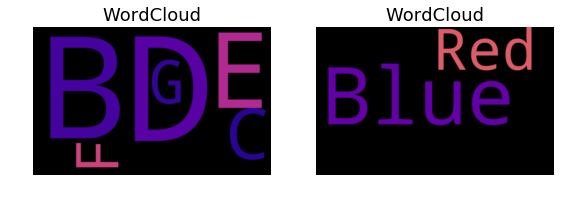

In [37]:
def clean_str_arr(series):
    if series.shape[0] == 0:
        return "EMPTY"
    else:
        series = series.dropna().astype(str).str.lower().str.replace("none", "").str.title()
        return " ".join(series)

def plot_cloud(col, ax, df, title = "WordCloud", cmap = "plasma"):
    string = clean_str_arr(df[col].copy())
    wordcloud = WordCloud(width=800, height=500,
                          collocations=True,
                          background_color="black",
                          max_words = 100,
                          colormap=cmap).generate(string)

    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title,  fontsize=18)
    ax.axis('off')

plotgrid = Plotgrid(["str_med", "str_small"], 2, [8,10])
plotgrid.build(func=plot_cloud, df=df)

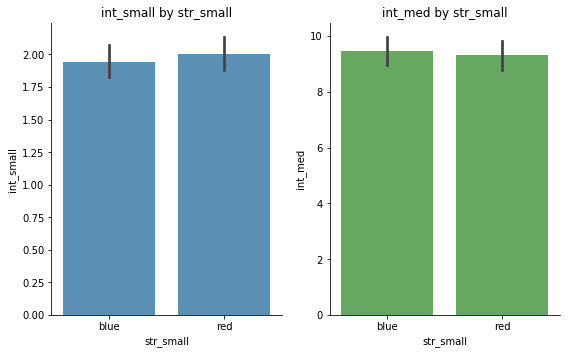

In [38]:
def single_bar(col, ax, df, x_var, iti_palette):
    sns.barplot(data=df,
        x=x_var,
        y=col,
        ax=ax,
        color=next(iti_palette),
        linewidth=1,
        alpha=.8)
    ax.set_title("{} by {}".format(col, x_var))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
plotgrid = Plotgrid(["int_small", "int_med"], 2, [8,5])
plotgrid.build(func=single_bar, df=df, x_var="str_small",
               iti_palette=itertools.cycle(sns.color_palette("Paired")[1::2]))